In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("solar_weather.csv")

In [3]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
print("The shape of dataframe is : ",df.shape)

The shape of dataframe is :  (196776, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [6]:
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [7]:
df.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [8]:
unique_counts = df.nunique()
print(unique_counts)

Time                      196776
Energy delta[Wh]            4556
GHI                         2277
temp                         503
pressure                      71
humidity                      79
wind_speed                   136
rain_1h                      311
snow_1h                      129
clouds_all                   101
isSun                          2
sunlightTime                  69
dayLength                     39
SunlightTime/daylength       101
weather_type                   5
hour                          24
month                         12
dtype: int64


In [9]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [10]:
df['month'] = df['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,January


## Univariate Analysis
### Analyzing the distribution of variables one variable at a time.

Showing analysis of continous varibles using Energy delta[Wh] as base column for showing all methods that can be applied on continous variables.

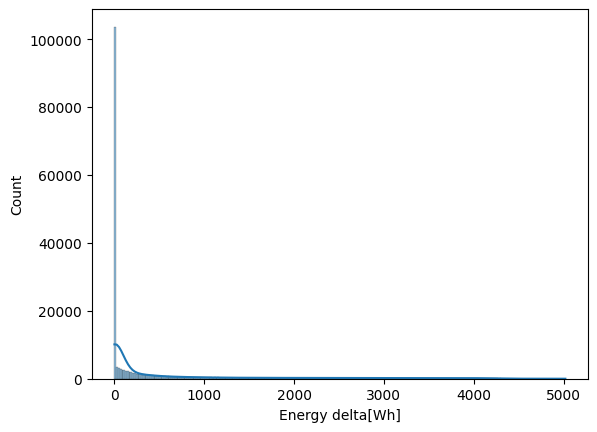

In [11]:
sns.histplot(df['Energy delta[Wh]'], kde=True)
plt.show()

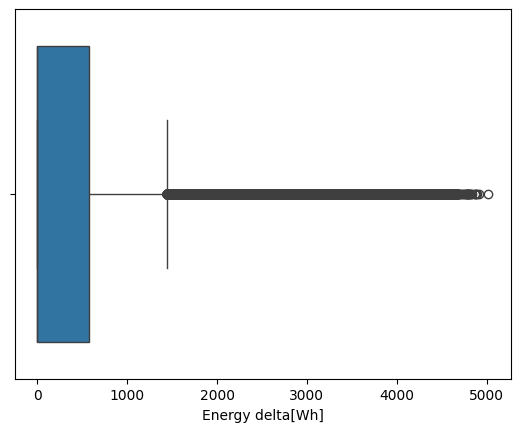

In [31]:
sns.boxplot(x=df['Energy delta[Wh]'])
plt.show()

In [13]:
#Skewness and Kurtosis
skewness = df['Energy delta[Wh]'].skew()
kurtosis = df['Energy delta[Wh]'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 2.009766715642249, Kurtosis: 2.972462949170307


In [14]:
#Getting outliers through qunatile
Q1 = df['Energy delta[Wh]'].quantile(0.25)
Q3 = df['Energy delta[Wh]'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned_iqr = df[(df['Energy delta[Wh]'] >= lower_bound) & (df['Energy delta[Wh]'] <= upper_bound)]

In [15]:
#Getting outliers through z-score
df['z_score'] = stats.zscore(df['Energy delta[Wh]'])
df_cleaned_z = df[df['z_score'].abs() <= 3]

In [16]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,z_score
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January,-0.548427
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January,-0.548427
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January,-0.548427
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January,-0.548427
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,January,-0.548427


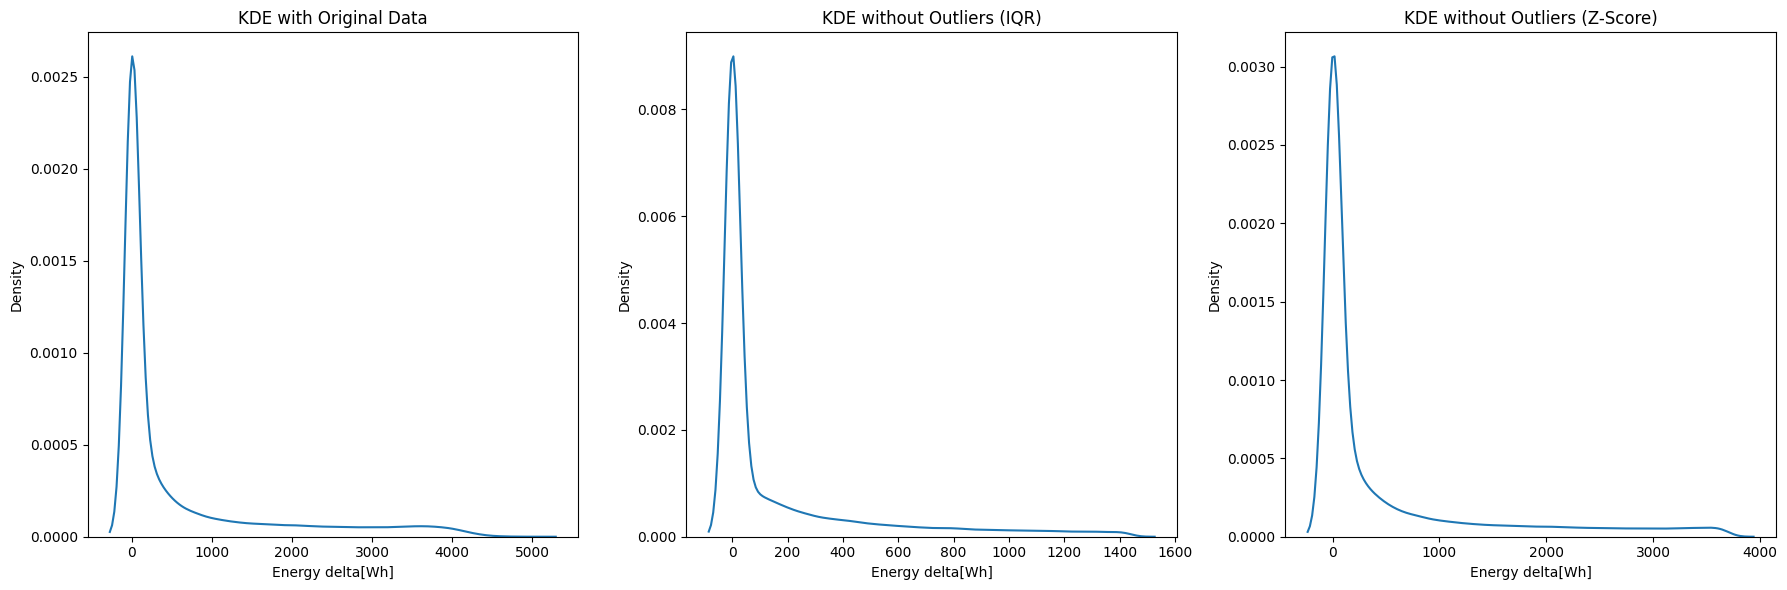

In [17]:
#KDE of original data vs IQR removed outliers vs Z-Score removed outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(df['Energy delta[Wh]'], ax=axes[0])
axes[0].set_title('KDE with Original Data')

sns.kdeplot(df_cleaned_iqr['Energy delta[Wh]'], ax=axes[1])
axes[1].set_title('KDE without Outliers (IQR)')

sns.kdeplot(df_cleaned_z['Energy delta[Wh]'], ax=axes[2])
axes[2].set_title('KDE without Outliers (Z-Score)')

plt.tight_layout()
plt.show()

### Analyzing categorical varibles

<Axes: xlabel='weather_type'>

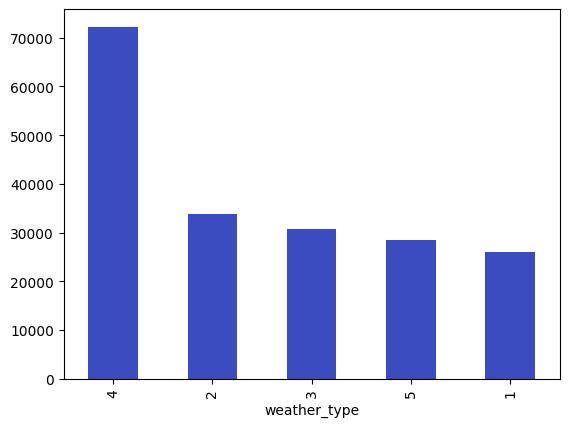

In [29]:
#Analyzing categorical variables
df_cleaned_z['weather_type'].value_counts().head(10).plot.bar(cmap='coolwarm')

<Axes: xlabel='isSun'>

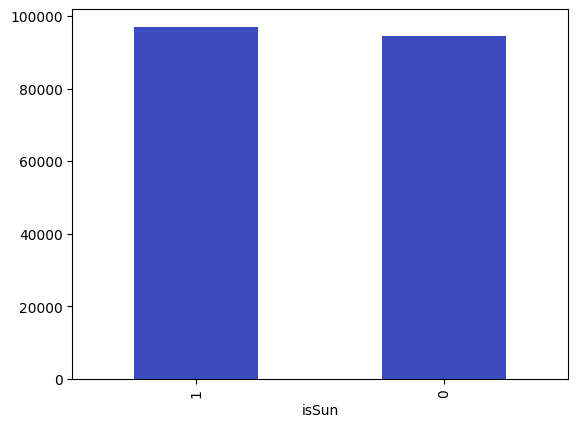

In [28]:
#Analyzing categorical variables
df_cleaned_z['isSun'].value_counts().head(10).plot.bar(cmap='coolwarm')

## Multivariate Analysis
### Used to show relation between two variables.

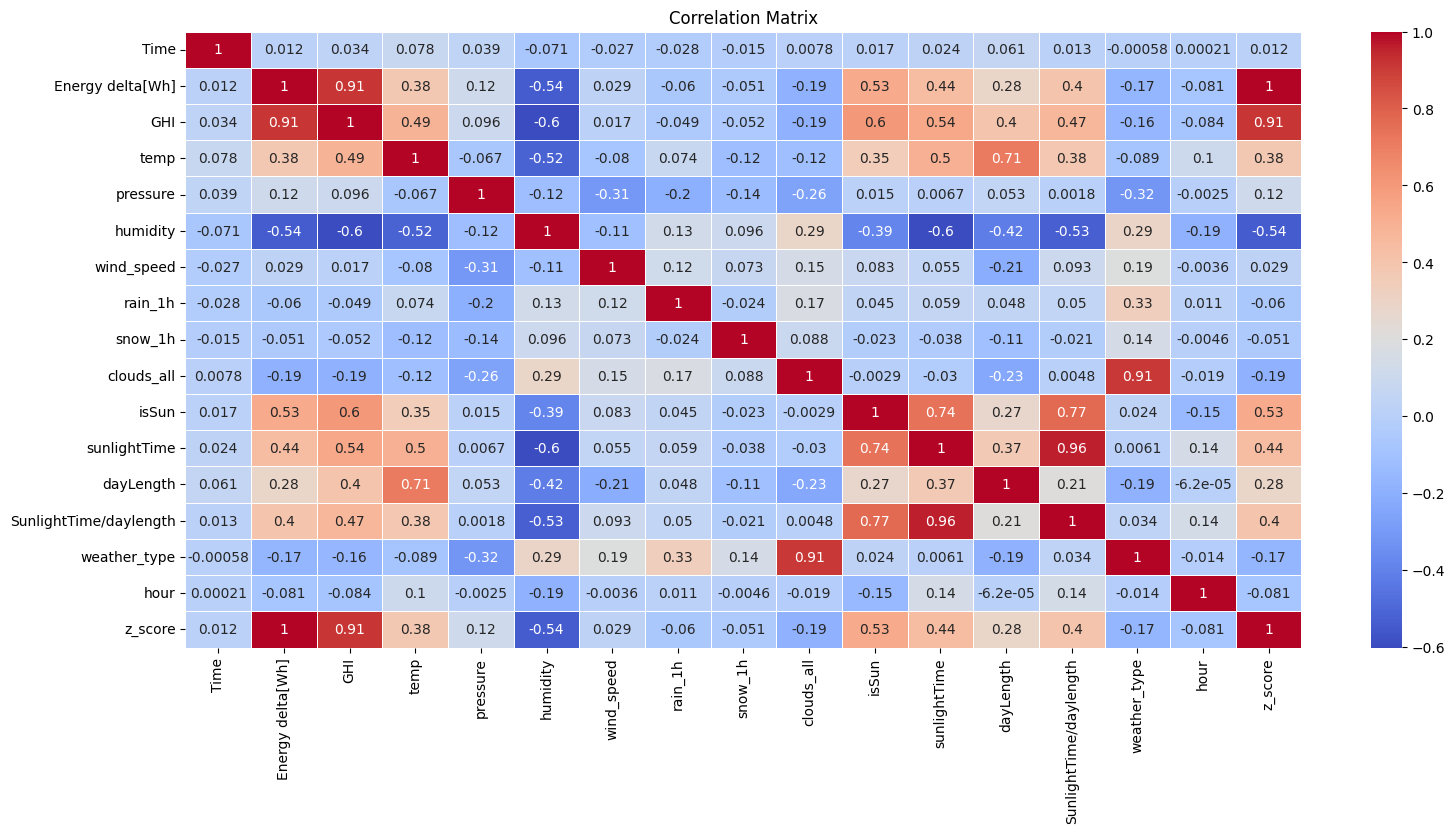

In [20]:
#Pairwise correlation between variables
corr_matrix = df.drop(columns=['month']).corr()
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix we can draw many meaningful inference of the relation between variables. <br>
1. Cells that have very high correlation say >0.7 have very positive correlation.
2. Cells that have lower or high negative values like <-0.7 have very high negative correlation.


/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/2371292767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['month'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/2371292767.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['month'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')


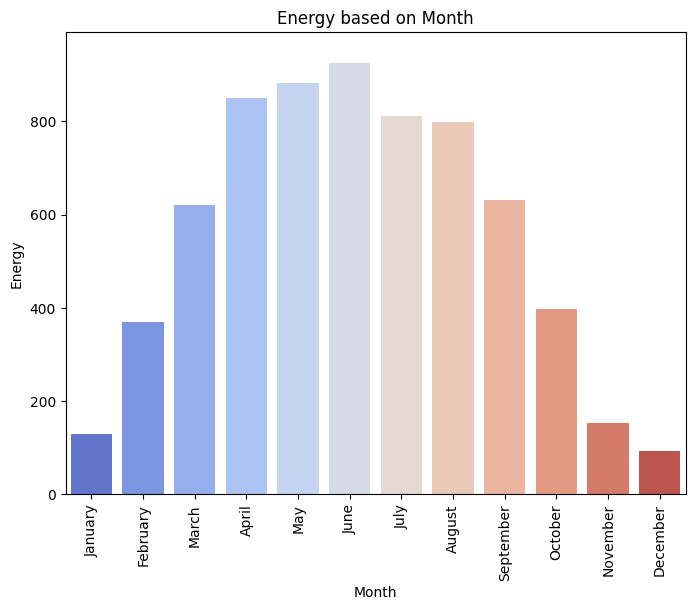

In [21]:
#Plotting energy vs monthly consumption
plt.figure(figsize=(8,6))
sns.barplot(x=df['month'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')
plt.title('Energy based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Energy')
plt.show()

/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/1080543658.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df['month'], y=df['GHI'],linewidth=5,errorbar=None,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/1080543658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['month'], y=df['GHI'], errwidth=0,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/1080543658.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['month'], y=df['GHI'], errwidth=0,palette='coolwarm')


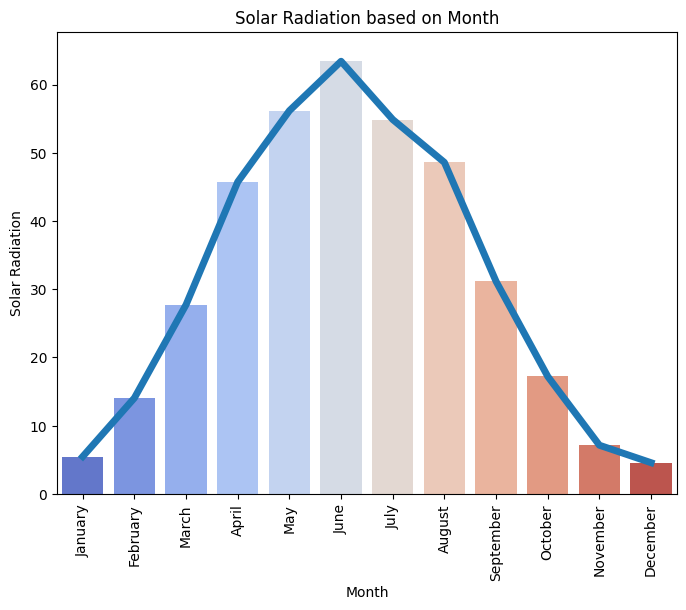

In [22]:
#Plotting energy vs monthly solar radiation
plt.figure(figsize=(8,6))
sns.lineplot(x=df['month'], y=df['GHI'],linewidth=5,errorbar=None,palette='coolwarm')
sns.barplot(x=df['month'], y=df['GHI'], errwidth=0,palette='coolwarm')
plt.title('Solar Radiation based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')
plt.show()

Text(0, 0.5, 'Count')

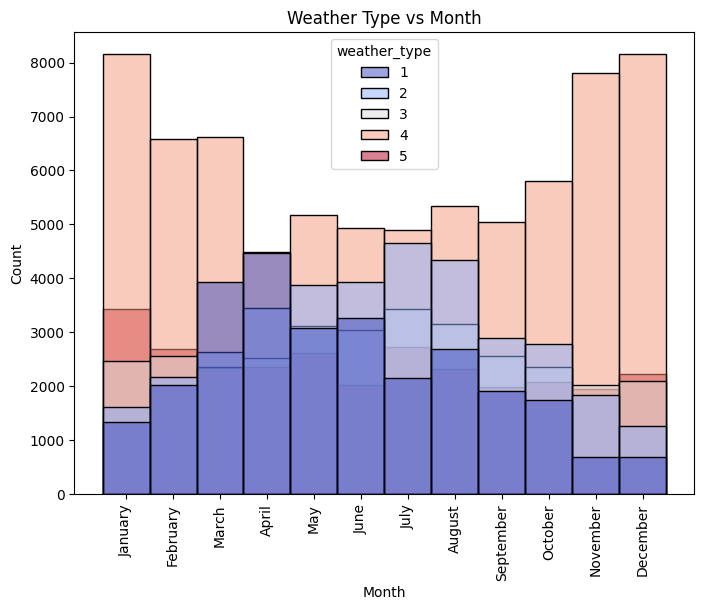

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['month'], hue=df['weather_type'], palette='coolwarm')
plt.title('Weather Type vs Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Count')

/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/2342164475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pressure'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/2342164475.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['pressure'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')


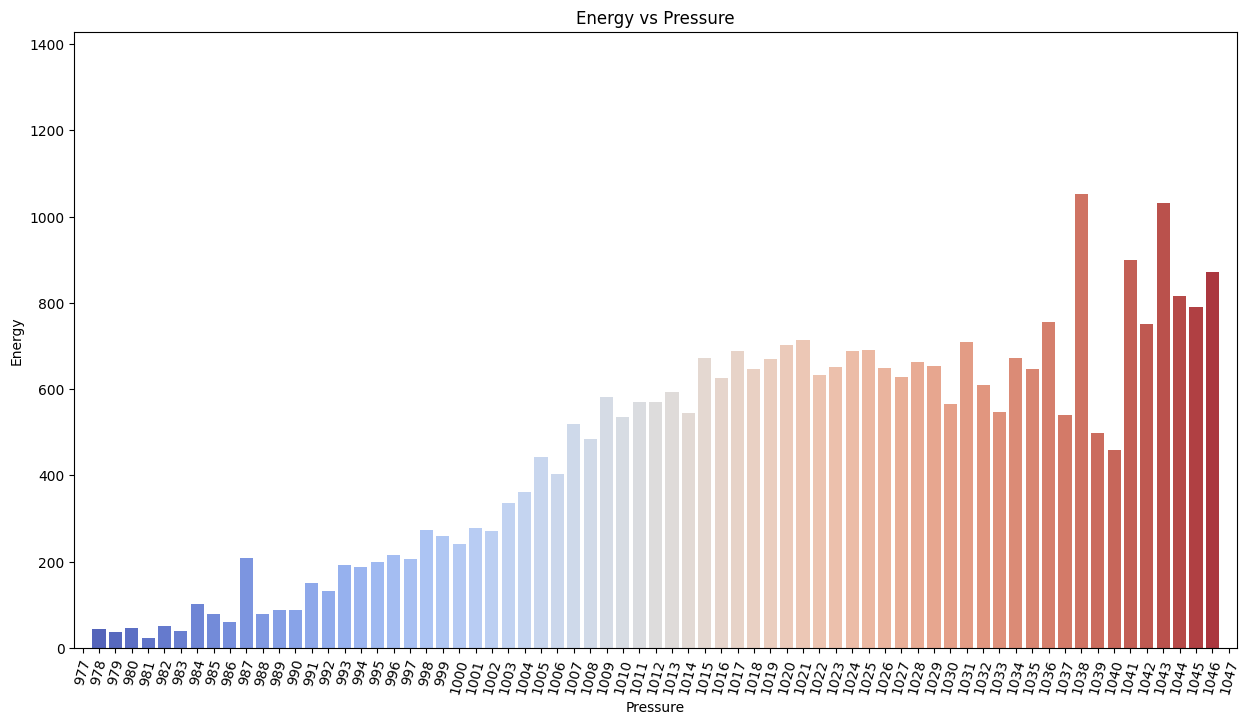

In [24]:
plt.figure(figsize=(15,8))
plt.title('Energy vs Pressure')
sns.barplot(x=df['pressure'], y=df['Energy delta[Wh]'], errwidth=0,palette='coolwarm')
plt.xlabel('Pressure')
plt.xticks(rotation=75)
plt.ylabel('Energy')
plt.show()

/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/1634156410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pressure'], y=df['GHI'], errwidth=0,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/1634156410.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['pressure'], y=df['GHI'], errwidth=0,palette='coolwarm')


Text(0, 0.5, 'Solar Radiation')

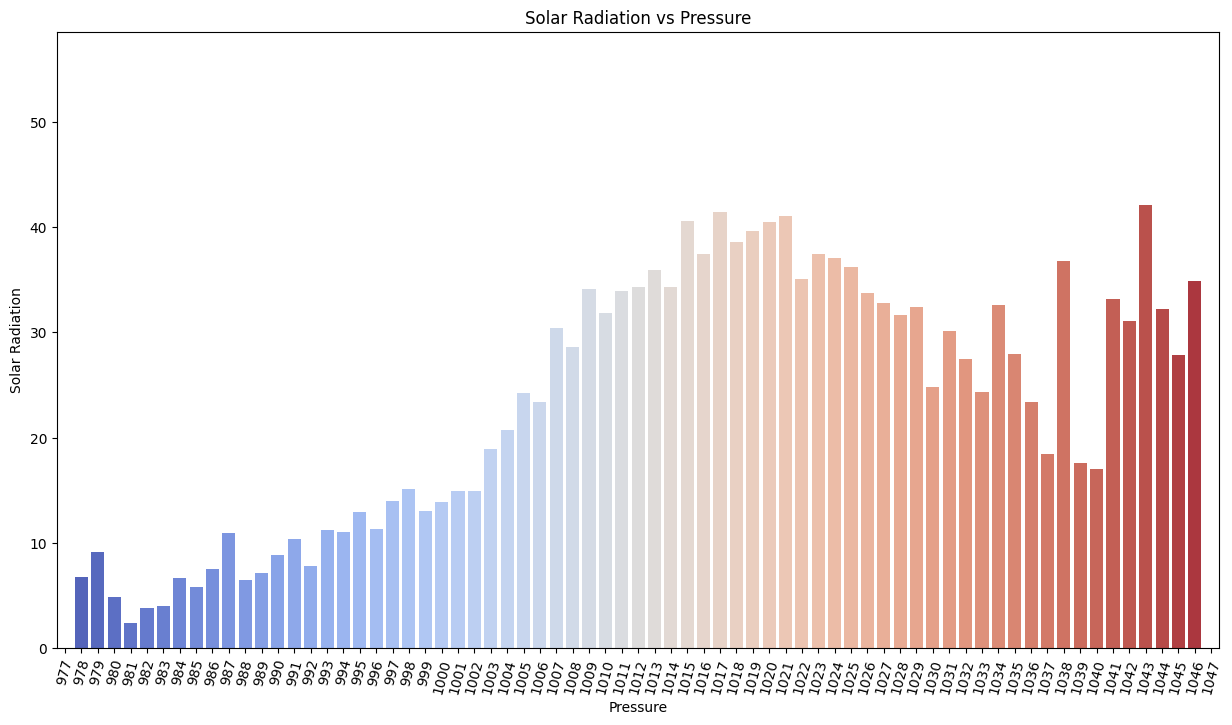

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['pressure'], y=df['GHI'], errwidth=0,palette='coolwarm')
plt.title('Solar Radiation vs Pressure')
plt.xlabel('Pressure')
plt.xticks(rotation=75)
plt.ylabel('Solar Radiation')

/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/4261978943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['weather_type'], y=df['GHI'], errwidth=0,palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/4261978943.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['weather_type'], y=df['GHI'], errwidth=0,palette='coolwarm')


Text(0, 0.5, 'Solar Radiation')

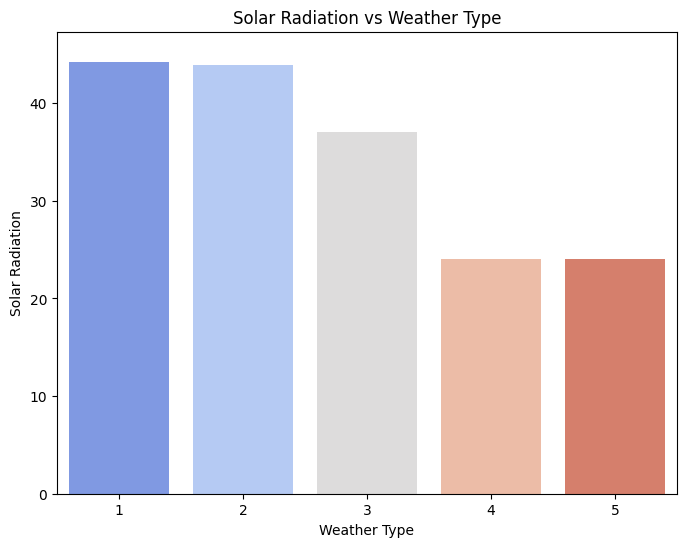

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['weather_type'], y=df['GHI'], errwidth=0,palette='coolwarm')
plt.title('Solar Radiation vs Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Solar Radiation')

/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/3886554808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['weather_type'], y=df['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
/var/folders/03/67nf7pq97bzchmfnt6_fjzbh0000gn/T/ipykernel_3434/3886554808.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=df['weather_type'], y=df['Energy delta[Wh]'], errwidth=0, palette='coolwarm')


Text(0, 0.5, 'Energy')

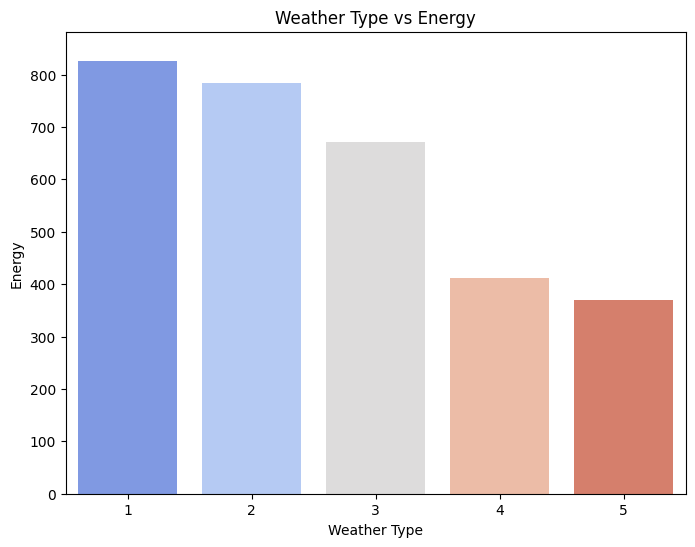

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['weather_type'], y=df['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
plt.title('Weather Type vs Energy')
plt.xlabel('Weather Type')
plt.ylabel('Energy')